In [34]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np



# Importing and Cleaning
Function that finds the average AQI based on age of vehicle

# Inputs
dataframe : clean up dataframe of movie data

# Output
Dataframe consisting of actors and year

In [35]:
#reference new csv
movie_data = pd.read_csv("clean_data.csv")

movie_data = movie_data.drop(columns="Unnamed: 0")
movie_data


,Title,Director,Movie Length (s),Genre,Headlining Actor,Gross,Keywords,Language,Country,Rating,Budget,Release Year,IMDB Score,Director Facebook Likes,Headlining Actor Facebook Likes,Movie Facebook Likes,Cast Facebook Likes
0,Avatar,James Cameron,178,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,760505847,avatar|future|marine|native|paraplegic,English,USA,PG-13,237000000,2009,7.9,0,1000,33000,4834
1,Pirates of the Caribbean: At World's End,Gore Verbinski,169,Action|Adventure|Fantasy,Johnny Depp,309404152,goddess|marriage ceremony|marriage proposal|pi...,English,USA,PG-13,300000000,2007,7.1,563,40000,0,48350
2,Spectre,Sam Mendes,148,Action|Adventure|Thriller,Christoph Waltz,200074175,bomb|espionage|sequel|spy|terrorist,English,UK,PG-13,245000000,2015,6.8,0,11000,85000,11700
3,The Dark Knight Rises,Christopher Nolan,164,Action|Thriller,Tom Hardy,448130642,deception|imprisonment|lawlessness|police offi...,English,USA,PG-13,250000000,2012,8.5,22000,27000,164000,106759
4,John Carter,Andrew Stanton,132,Action|Adventure|Sci-Fi,Daryl Sabara,73058679,alien|american civil war|male nipple|mars|prin...,English,USA,PG-13,263700000,2012,6.6,475,640,24000,1873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3811,Primer,Shane Carruth,77,Drama|Sci-Fi|Thriller,Shane Carruth,424760,changing the future|independent film|invention...,English,USA,PG-13,7000,2004,7.0,291,291,19000,368
3812,Cavite,Neill Dela Llana,80,Thriller,Ian Gamazon,70071,jihad|mindanao|philippines|security guard|squa...,English,Philippines,Not Rated,7000,2005,6.3,0,0,74,0
3813,El Mariachi,Robert Rodriguez,81,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,2040920,assassin|death|guitar|gun|mariachi,Spanish,USA,R,7000,1992,6.9,0,121,0,147
3814,Newlyweds,Edward Burns,95,Comedy|Drama,Kerry Bishé,4584,written and directed by cast member,English,USA,Not Rated,9000,2011,6.4,0,296,413,690


In [36]:
actor_df = movie_data[["Headlining Actor", "Title", "Release Year"]]
actor_df.head()

,Headlining Actor,Title,Release Year
0,CCH Pounder,Avatar,2009
1,Johnny Depp,Pirates of the Caribbean: At World's End,2007
2,Christoph Waltz,Spectre,2015
3,Tom Hardy,The Dark Knight Rises,2012
4,Daryl Sabara,John Carter,2012


In [37]:
actor_df.set_index("Headlining Actor").sort_index().head(10)

,Title,Release Year
Headlining Actor,,
50 Cent,Get Rich or Die Tryin',2005
Aaliyah,Queen of the Damned,2002
Aasif Mandvi,Ghost Town,2008
Abbie Cornish,Bright Star,2009
Abbie Cornish,Seven Psychopaths,2012
Abbie Cornish,Legend of the Guardians: The Owls of Ga'Hoole,2010
Adam Arkin,Hanging Up,2000
Adam Baldwin,Radio Flyer,1992
Adam Baldwin,Predator 2,1990


In [38]:
actor_df.groupby("Headlining Actor").count().head(10)

,Title,Release Year
Headlining Actor,,
50 Cent,1,1
Aaliyah,1,1
Aasif Mandvi,1,1
Abbie Cornish,3,3
Adam Arkin,1,1
Adam Baldwin,4,4
Adam Garcia,3,3
Adam Goldberg,4,4
Adam LeFevre,1,1


In [39]:
actor_df = actor_df.loc[actor_df.duplicated(subset='Headlining Actor', keep=False), :]
actor_df.groupby("Release Year").count().tail(15)

,Headlining Actor,Title
Release Year,,
2002,154,154
2003,106,106
2004,140,140
2005,142,142
2006,144,144
2007,116,116
2008,140,140
2009,135,135
2010,135,135


In [40]:
#get the 8 most busiest actors from list
n=8
actor_df['Headlining Actor'].value_counts().nlargest(n)

Robert De Niro       42
Johnny Depp          39
J.K. Simmons         31
Nicolas Cage         31
Denzel Washington    30
Bruce Willis         29
Matt Damon           29
Liam Neeson          26
Name: Headlining Actor, dtype: int64

In [41]:
top_actors_df = actor_df[(actor_df["Headlining Actor"] == 'Robert De Niro')|(actor_df["Headlining Actor"] == 'Johnny Depp')|
                         (actor_df["Headlining Actor"] == 'J.K. Simmons')|(actor_df["Headlining Actor"] == 'Nicolas Cage')|
                         (actor_df["Headlining Actor"] == 'Denzel Washington')|(actor_df["Headlining Actor"] == 'Bruce Willis')|
                         (actor_df["Headlining Actor"] == 'Matt Damon')|(actor_df["Headlining Actor"] == 'Liam Neeson')]

top_actors_df

,Headlining Actor,Title,Release Year
1,Johnny Depp,Pirates of the Caribbean: At World's End,2007
5,J.K. Simmons,Spider-Man 3,2007
12,Johnny Depp,Pirates of the Caribbean: Dead Man's Chest,2006
13,Johnny Depp,The Lone Ranger,2013
17,Johnny Depp,Pirates of the Caribbean: On Stranger Tides,2011
...,...,...,...
3525,Johnny Depp,A Nightmare on Elm Street,1984
3578,Bruce Willis,Mercury Rising,1998
3587,Bruce Willis,Lucky Number Slevin,2006
3617,J.K. Simmons,Juno,2007


In [42]:
#remove actors that do not release more in one year
repeat_actors_df = top_actors_df[top_actors_df.duplicated(subset=["Headlining Actor", "Release Year"], keep=False)]
repeat_actors_df = repeat_actors_df.sort_values(by="Release Year")

repeat_actors_df

,Headlining Actor,Title,Release Year
1342,Johnny Depp,A Nightmare on Elm Street,1984
3525,Johnny Depp,A Nightmare on Elm Street,1984
1608,Denzel Washington,Glory,1989
2216,Denzel Washington,Glory,1989
1019,Denzel Washington,The Pelican Brief,1993
...,...,...,...
1531,Liam Neeson,The Nut Job,2014
771,Johnny Depp,Mortdecai,2015
861,Johnny Depp,Black Mass,2015
963,Liam Neeson,Run All Night,2015


In [43]:
#how many duplicates I had
repeat_actors_df.duplicated().sum()

14

In [44]:
#show how much duplicateds look like
repeat_actors_df.loc[repeat_actors_df.duplicated(), :]

,Headlining Actor,Title,Release Year
3525,Johnny Depp,A Nightmare on Elm Street,1984
2216,Denzel Washington,Glory,1989
3578,Bruce Willis,Mercury Rising,1998
3446,Johnny Depp,The Astronaut's Wife,1999
1036,Johnny Depp,From Hell,2001
921,Matt Damon,Syriana,2005
3587,Bruce Willis,Lucky Number Slevin,2006
3020,J.K. Simmons,Spider-Man 3,2007
3022,J.K. Simmons,Juno,2007
32,Johnny Depp,Alice in Wonderland,2010


In [45]:
#remove duplicated entries from the original DataFrame
repeat_actors_df.drop_duplicates(inplace=True)
repeat_actors_df

,Headlining Actor,Title,Release Year
1342,Johnny Depp,A Nightmare on Elm Street,1984
1608,Denzel Washington,Glory,1989
1019,Denzel Washington,The Pelican Brief,1993
2344,Denzel Washington,Philadelphia,1993
2245,Johnny Depp,Ed Wood,1994
...,...,...,...
1531,Liam Neeson,The Nut Job,2014
771,Johnny Depp,Mortdecai,2015
861,Johnny Depp,Black Mass,2015
963,Liam Neeson,Run All Night,2015


In [46]:
#checking for any duplicated entries
repeat_actors_df.loc[repeat_actors_df.duplicated(), :]

,Headlining Actor,Title,Release Year


In [47]:
#Create graph dataframe
graph_df = repeat_actors_df.groupby(["Headlining Actor", "Release Year"]).count()
graph_df = graph_df.rename(columns={"Title": 'Busiest Actors in a Single Year'})
graph_df

Busiest Actors in a Single Year
Headlining Actor Release Year                                 
Bruce Willis     1998                                        2
                 1999                                        3
                 2000                                        2
                 2006                                        3
                 2010                                        2
...                                                        ...
Robert De Niro   2002                                        2
                 2004                                        4
                 2008                                        2
                 2010                                        3
                 2013                                        2

[66 rows x 1 columns]

# Analysis 

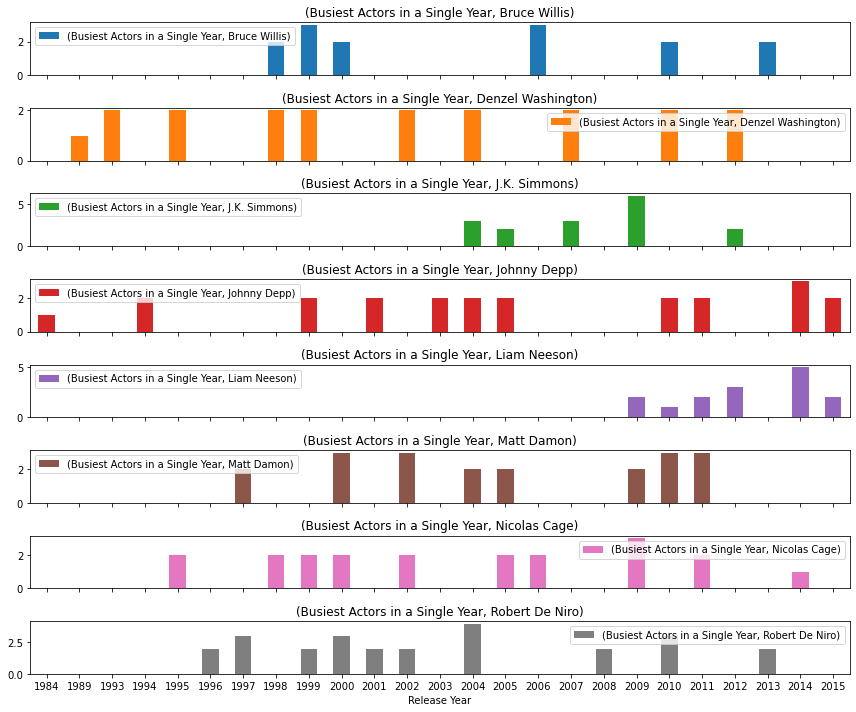

In [48]:
#Bar chart for each top actor 1984-2015
gh = graph_df.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(12, 10))
plt.tight_layout()
plt.savefig("../Images/Busy_Actors.png")